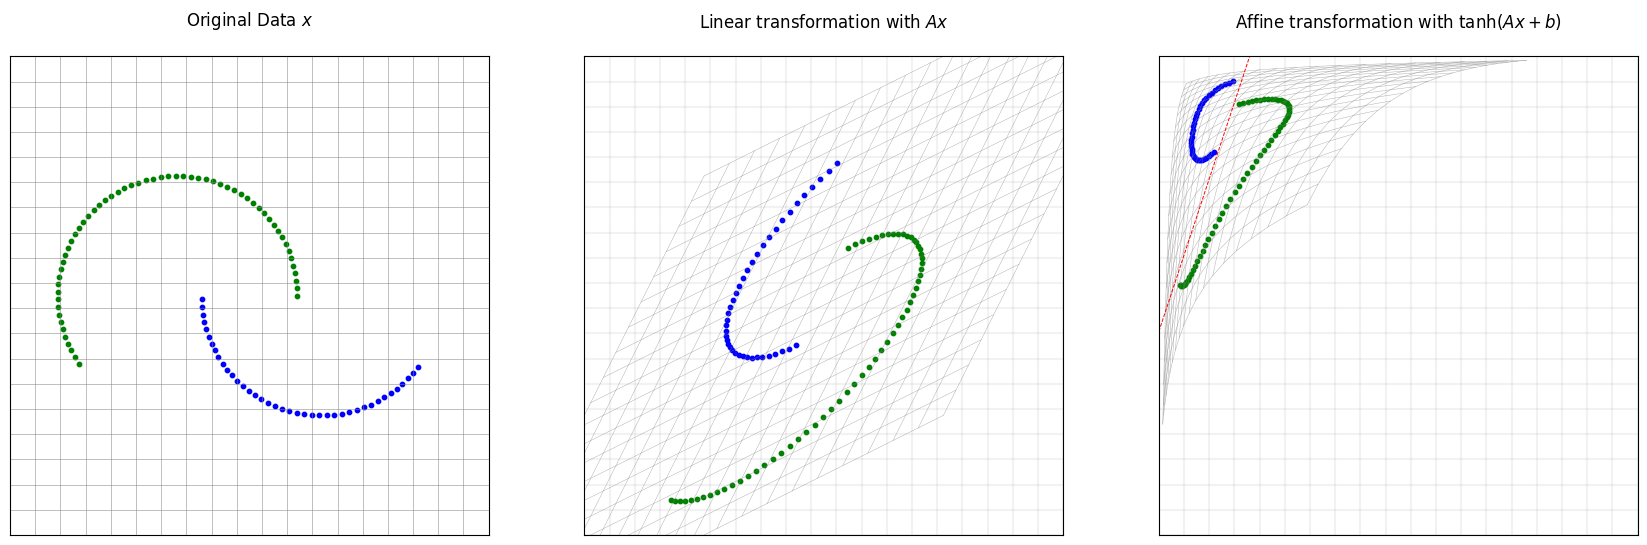

In [62]:
import numpy as np
import matplotlib.pyplot as plt

matrix_a = np.array([[0.5, 1], [1, 0.5]])
translation_b = np.array([-0.9, 0.9])

grid_x, grid_y = np.meshgrid(np.linspace(-1, 1, 20), np.linspace(-1, 1, 20))

def apply_transformation(x, y, matrix_a, translation_b, apply_tanh=False):
    points = np.stack([x, y], axis=-1)
    
    for epi, each_points in enumerate(points):
        each_points = each_points @ matrix_a + translation_b
        if apply_tanh:
            each_points = np.tanh(each_points)
    
        points[epi] = each_points
    
    return points[..., 0], points[..., 1]

def generate_circle_points(center, radius, num_points=100):
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)
    return x, y

fig, ax = plt.subplots(1, 3, figsize=(7 * 3, 7))
for each_ax in ax.flatten():
    each_ax.set_aspect("equal")
    each_ax.set_xlim(-1, 1)
    each_ax.set_ylim(-1, 1)
    each_ax.set_xticks([])
    each_ax.set_yticks([])

for i in range(len(grid_x)):
    ax[0].plot(grid_x[i, :], grid_y[i, :], color="gray", alpha=0.7, linewidth=0.5)
    ax[0].plot(grid_x[:, i], grid_y[:, i], color="gray", alpha=0.7, linewidth=0.5)

# Plot the original grid with a circle
circle_1_x, circle_1_y = generate_circle_points(center=(-0.3, 0), radius=0.5)
circle_1_x = circle_1_x[:60]
circle_1_y = circle_1_y[:60]

circle_2_x, circle_2_y = generate_circle_points(center=(0.3, 0), radius=0.5)
circle_2_x = circle_2_x[50:90]
circle_2_y = circle_2_y[50:90]

ax[0].scatter(circle_1_x, circle_1_y, color="green", alpha=1.0, s=10)
ax[0].scatter(circle_2_x, circle_2_y, color="blue", alpha=1.0, s=10)
ax[0].set_title(r"Original Data $x$" + "\n")

grid_u, grid_v = apply_transformation(grid_x, grid_y, matrix_a, np.array([0, 0]), apply_tanh=False)
for i in range(len(grid_x)):
    ax[1].plot(grid_x[i, :], grid_y[i, :], color="gray", alpha=0.1)
    ax[1].plot(grid_x[:, i], grid_y[:, i], color="gray", alpha=0.1)
    ax[1].plot(grid_u[i, :], grid_v[i, :], color="gray", alpha=0.7, linewidth=0.3)
    ax[1].plot(grid_u[:, i], grid_v[:, i], color="gray", alpha=0.7, linewidth=0.3)

circle_1_u, circle_1_v = apply_transformation(circle_1_x, circle_1_y, matrix_a, np.array([0, 0]), apply_tanh=False)
circle_2_u, circle_2_v = apply_transformation(circle_2_x, circle_2_y, matrix_a, np.array([0, 0]), apply_tanh=False)
ax[1].scatter(circle_1_u, circle_1_v, color="green", alpha=1.0, s=10)
ax[1].scatter(circle_2_u, circle_2_v, color="blue", alpha=1.0, s=10)
ax[1].set_title(r"Linear transformation with $Ax$" + "\n")

grid_u, grid_v = apply_transformation(grid_x, grid_y, matrix_a, translation_b, apply_tanh=True)
for i in range(len(grid_x)):
    ax[2].plot(grid_x[i, :], grid_y[i, :], color="gray", alpha=0.1)
    ax[2].plot(grid_x[:, i], grid_y[:, i], color="gray", alpha=0.1)
    ax[2].plot(grid_u[i, :], grid_v[i, :], color="gray", alpha=0.7, linewidth=0.3)
    ax[2].plot(grid_u[:, i], grid_v[:, i], color="gray", alpha=0.7, linewidth=0.3)

circle_1_u, circle_1_v = apply_transformation(circle_1_x, circle_1_y, matrix_a, translation_b, apply_tanh=True)
circle_2_u, circle_2_v = apply_transformation(circle_2_x, circle_2_y, matrix_a, translation_b, apply_tanh=True)
ax[2].scatter(circle_1_u, circle_1_v, color="green", alpha=1.0, s=10)
ax[2].scatter(circle_2_u, circle_2_v, color="blue", alpha=1.0, s=10)
ax[2].set_title(r"Affine transformation with $\tanh(Ax + b)$" + "\n")

# ax[2].plot(np.array([-0.95, -0.62]), np.array([0, 1]), color="red", linestyle="--")
def equation_for_line(x):
    return 3.03 * x + 2.88

x_values = np.linspace(-1, 1, 100)
y_values = equation_for_line(x_values)
ax[2].plot(x_values, y_values, color="red", linestyle="--", linewidth=0.7)

plt.show()
